# Análise exploratória de dados

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

sns.set_palette("Reds")

## 1. Leitura do conjunto de dados

In [11]:
Image(url='https://imgur.com/RcLLVLq.png')

In [7]:
df = pd.read_csv('../data/raw/heart_statlog_cleveland_hungary_final.csv')
df.head

<bound method NDFrame.head of       age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   


## 2. Descrição dos dados

O conjunto de dados de doenças cardíacas é um dos maiores disponíveis para pesquisa na área de aprendizado de máquina e mineração de dados relacionados a doenças cardíacas. Este dataset contém informações demográficas e clínicas de pacientes provenientes de cinco conjuntos de dados de doenças cardíacas: Cleveland, Húngaro, Suíço, Long Beach VA e Statlog. Esses conjuntos de dados foram combinados para criar um único dataset abrangente, com 1190 instâncias e 11 características comuns. O objetivo é auxiliar na pesquisa de algoritmos que possam avançar no diagnóstico clínico e tratamento precoce de doenças arteriais coronarianas.

## 2.1. Dicionário de dados

In [8]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,age,Idade do paciente em anos.,quantitativa,contínua
1,sex,"Sexo do paciente (1 = Masculino, 0 = Feminino).",qualitativa,nominal
2,chest pain type,"Tipo de dor no peito (1: Angina típica, 2: Ang...",qualitativa,ordinal
3,resting bp s,Pressão arterial em repouso (em mm Hg).,quantitativa,contínua
4,cholesterol,Colesterol sérico em mg/dl.,quantitativa,contínua
5,fasting blood sugar,Açúcar no sangue em jejum > 120 mg/dl (1 = Ver...,qualitativa,nominal
6,resting ecg,Resultados do eletrocardiograma em repouso (0:...,qualitativa,ordinal
7,max heart rate,Frequência cardíaca máxima alcançada.,quantitativa,contínua
8,exercise angina,"Angina induzida por exercício (1 = Sim, 0 = Não).",qualitativa,nominal
9,oldpeak,Depressão do segmento ST induzida por exercíci...,quantitativa,contínua


- São no total 11 variáveis, sendo 5 variáveis quantitativas contínuas, 6 variáveis qualitativas sendo 4 nominais e 2 ordinais.

## 3. Perguntas de partida e hipóteses

- **Pergunta 1:** Quais fatores estão mais fortemente associados à presença de doença cardíaca?

    **Hipótese 1:** Níveis elevados de colesterol e pressão arterial estão associados a uma maior probabilidade de doença cardíaca.

- **Pergunta 2:** Existe uma correlação entre a idade e a presença de doença cardíaca?

    **Hipótese 2:** Pacientes mais velhos têm uma maior probabilidade de apresentar doença cardíaca.

- **Pergunta 3:** O sexo influencia a probabilidade de desenvolver doença cardíaca?

    **Hipótese 3:** Homens têm uma maior probabilidade de desenvolver doença cardíaca em comparação com mulheres.

- **Pergunta 4:** A presença de angina induzida por exercício está associada à gravidade da doença cardíaca?

    **Hipótese 4:** Pacientes que apresentam angina durante o exercício têm uma maior probabilidade de ter uma doença cardíaca mais grave.

- **Pergunta 5:** Como diferentes tipos de dor no peito estão relacionados ao risco de doença cardíaca?

    **Hipótese 5:** Pacientes com dor no peito do tipo angina típica têm uma maior chance de desenvolver doença cardíaca.

In [15]:
file_path = ('../data/raw/heart_statlog_cleveland_hungary_final.csv')
dataset = pd.read_csv(file_path)

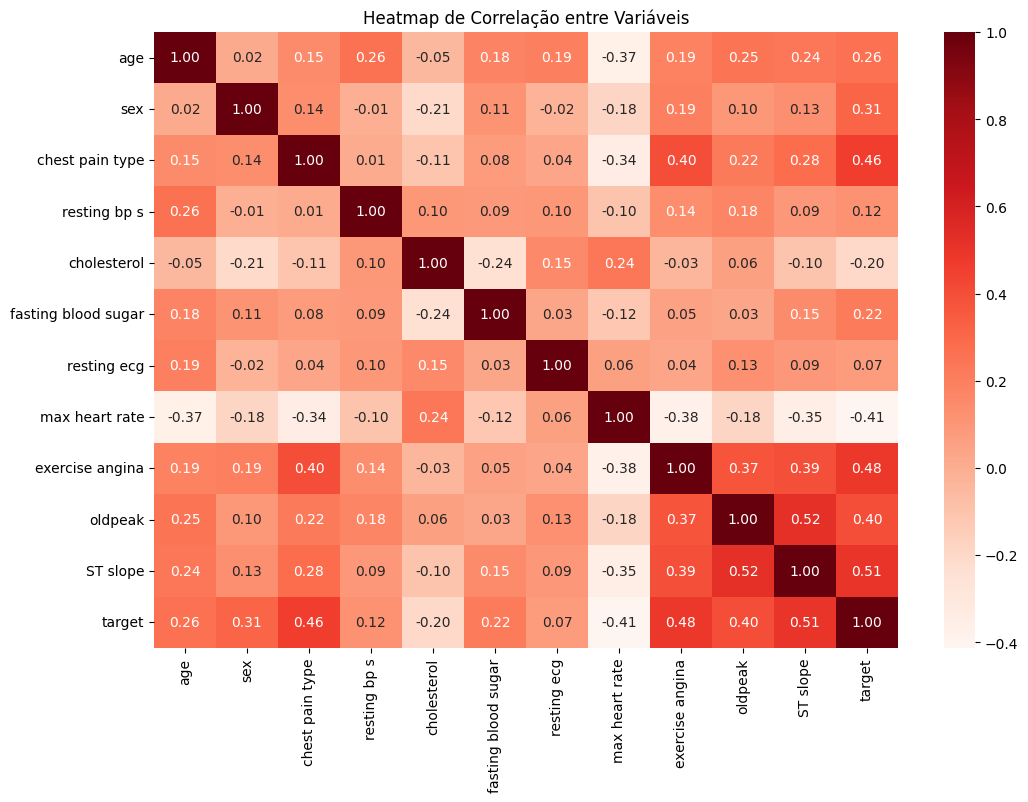

In [27]:
# Pergunta 1: Fatores associados à presença de doença cardíaca
plt.figure(figsize=(12, 8))
correlacoes = dataset.corr()
sns.heatmap(correlacoes, annot=True, cmap='Reds', fmt=".2f")
plt.title('Heatmap de Correlação entre Variáveis')
plt.show()

## 1. Correlação Positiva e Negativa:

- **Correlação Positiva:** Valores positivos indicam que à medida que uma variável aumenta, a presença de doença cardíaca também tende a aumentar.
- **Correlação Negativa:** Valores negativos indicam que à medida que uma variável aumenta, a presença de doença cardíaca tende a diminuir.

## 2. **Variáveis Mais Correlacionadas com a Doença Cardíaca (target):**

- chest pain type (Tipo de dor no peito):

        Correlação: 0,46
        Interpretação: Este é o fator mais fortemente associado à presença de doença cardíaca. Isso sugere que o tipo de dor no peito é um forte indicador de risco cardíaco. Pacientes com dor no peito, especialmente angina, têm uma probabilidade significativamente maior de ter doença cardíaca.

- exercise angina (Angina induzida por exercício):

        Correlação: 0,48
        Interpretação: Pacientes que experimentam angina durante o exercício têm uma alta probabilidade de estar sofrendo de doença cardíaca. Este resultado é consistente com a fisiologia do coração, onde a angina induzida pelo exercício é um sinal clássico de obstrução arterial.

- oldpeak (Depressão do segmento ST):

        Correlação: 0,40
        Interpretação: A depressão do segmento ST após o exercício é um indicador importante de isquemia miocárdica, que está fortemente associada à presença de doença cardíaca. Este valor alto de correlação reforça a importância dos resultados de testes de esforço no diagnóstico de doenças cardíacas.

- ST slope (Inclinação do segmento ST):

        Correlação: 0,51
        Interpretação: A inclinação do segmento ST também mostra uma forte correlação com a presença de doença cardíaca. Uma inclinação anormal é um sinal significativo de que o coração está sofrendo de estresse durante o esforço, o que pode indicar doença arterial coronariana.

## 3. Variáveis Menos Correlacionadas:

- cholesterol (Colesterol):

        Correlação: -0,20
        Interpretação: O colesterol tem uma correlação negativa fraca com a doença cardíaca neste dataset, o que pode parecer contraintuitivo. No entanto, isso pode ser devido a outros fatores confundidores ou à natureza do dataset específico, onde o colesterol sozinho não é um preditor tão forte quanto outros fatores.
        
- resting bp s (Pressão arterial em repouso):

        Correlação: 0,12
        Interpretação: A pressão arterial em repouso tem uma correlação positiva, mas relativamente fraca. Embora seja um fator de risco conhecido para doenças cardíacas, neste dataset específico, a pressão arterial em repouso não é um dos principais preditores.
        
## 4. Idade (age) e Sexo (sex):

- Idade: Correlação: 0,26

        Interpretação: A idade tem uma correlação positiva moderada, indicando que à medida que a idade aumenta, a probabilidade de doença cardíaca também aumenta. Isso é consistente com o entendimento médico de que a idade é um fator de risco significativo para doenças cardíacas.

- Sexo: Correlação: 0,31
        
        Interpretação: O sexo masculino (representado como 1) tem uma correlação positiva com a presença de doença cardíaca, indicando que homens têm uma maior probabilidade de desenvolver a condição em comparação com mulheres.

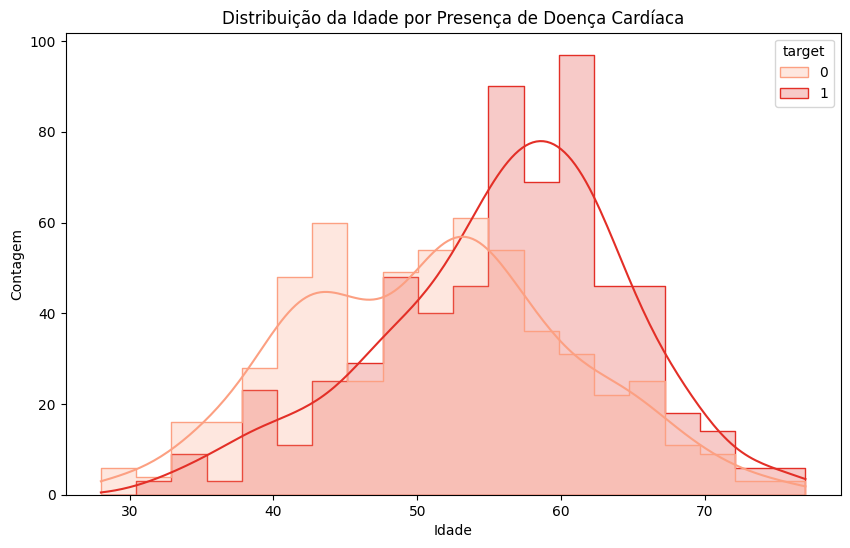

In [19]:
# Pergunta 2: Correlação entre idade e presença de doença cardíaca
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='age', hue='target', kde=True, element="step", palette='Reds')
plt.title('Distribuição da Idade por Presença de Doença Cardíaca')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

- O gráfico mostra que a presença de doença cardíaca aumenta com a idade. Há um pico na faixa etária de 50 a 60 anos, o que indica que pacientes nesta faixa etária são mais propensos a desenvolver a condição.
- Pacientes mais jovens (abaixo de 40 anos) têm uma menor incidência de doença cardíaca, enquanto a prevalência aumenta significativamente à medida que os pacientes envelhecem.
- Isso confirma a hipótese de que a idade é um fator importante no desenvolvimento de doenças cardíacas, com pacientes mais velhos correndo maior risco.

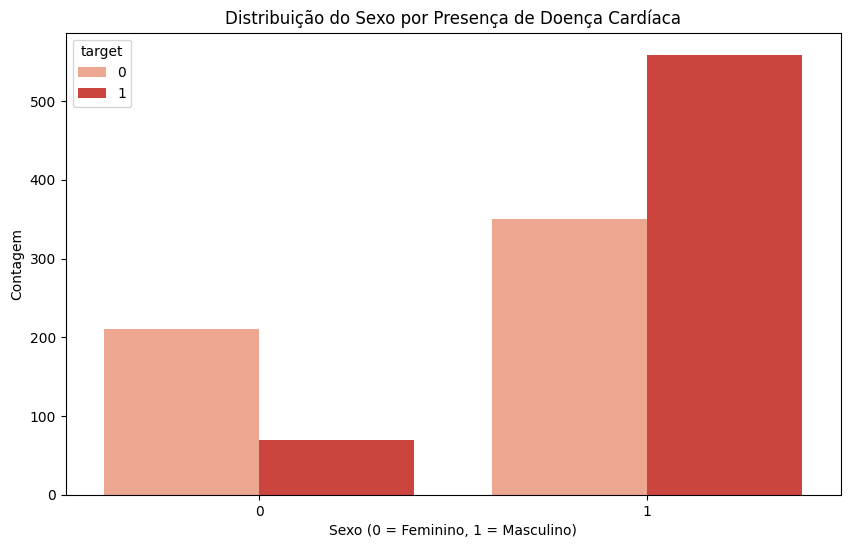

In [20]:
# Pergunta 3: Influência do sexo na probabilidade de desenvolver doença cardíaca
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='sex', hue='target', palette='Reds')
plt.title('Distribuição do Sexo por Presença de Doença Cardíaca')
plt.xlabel('Sexo (0 = Feminino, 1 = Masculino)')
plt.ylabel('Contagem')
plt.show()

- O gráfico indica que os homens (representados por 1 no eixo sex) têm uma maior probabilidade de desenvolver doença cardíaca em comparação com as mulheres (representadas por 0).
- Isso confirma a hipótese de que o sexo é um fator influente, com os homens apresentando maior risco de doença cardíaca. Este resultado é consistente com pesquisas médicas que apontam para uma maior prevalência de doenças cardíacas em homens, possivelmente devido a fatores biológicos e de estilo de vida.

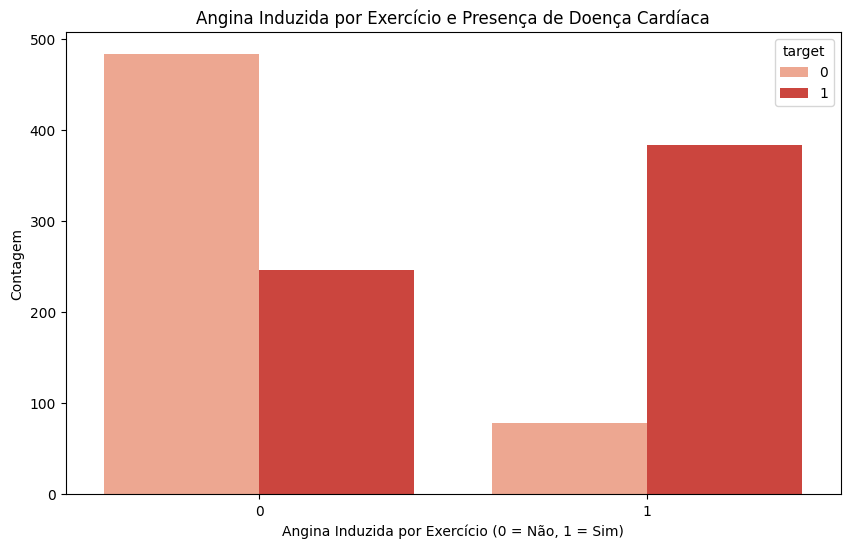

In [21]:
# Pergunta 4: Angina induzida por exercício e doença cardíaca
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='exercise angina', hue='target', palette='Reds')
plt.title('Angina Induzida por Exercício e Presença de Doença Cardíaca')
plt.xlabel('Angina Induzida por Exercício (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

- Pacientes que experimentam angina induzida por exercício (exercise angina igual a 1) têm uma probabilidade significativamente maior de apresentar doença cardíaca, conforme ilustrado pelo gráfico.
- A angina induzida por exercício é um sinal claro de insuficiência coronariana e, portanto, está fortemente associada à presença de doença cardíaca.
- Isso confirma a hipótese de que a angina durante o exercício é um indicador crítico de doença cardíaca mais grave.

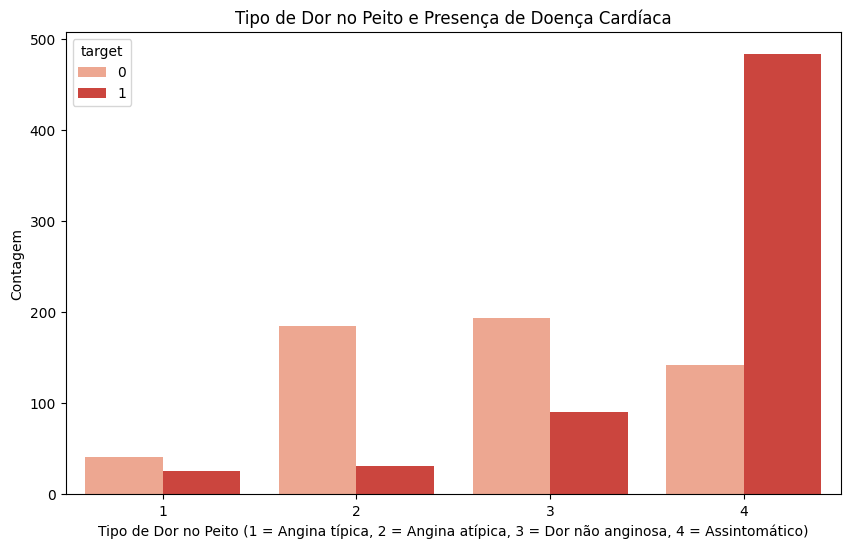

In [22]:
# Pergunta 5: Tipo de dor no peito e risco de doença cardíaca
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='chest pain type', hue='target', palette='Reds')
plt.title('Tipo de Dor no Peito e Presença de Doença Cardíaca')
plt.xlabel('Tipo de Dor no Peito (1 = Angina típica, 2 = Angina atípica, 3 = Dor não anginosa, 4 = Assintomático)')
plt.ylabel('Contagem')
plt.show()

- O gráfico mostra que os pacientes com chest pain type igual a 1 (angina típica) e 2 (angina atípica) têm uma maior probabilidade de ter doença cardíaca.
- Pacientes com dor não anginosa (chest pain type igual a 3) e aqueles que são assintomáticos (chest pain type igual a 4) têm menor incidência de doença cardíaca.
- Este resultado sugere que a dor no peito, especialmente angina típica, é um indicador muito importante do risco de doença cardíaca, alinhando-se com a literatura médica que associa angina ao estreitamento das artérias coronárias.

## 4. Insights

Com base nas visualizações criadas e na análise das correlações entre as variáveis, os insights mais relevantes que conseguimos adquirir são:

- Sintomas físicos como indicadores fortes: Pacientes que apresentaram tipos específicos de dor no peito, especialmente angina típica e angina atípica, têm uma maior probabilidade de desenvolver doenças cardíacas. Esses sintomas são fortes indicadores do estado do coração e devem ser considerados seriamente no diagnóstico clínico.

- O papel crucial dos resultados de testes de esforço: A depressão do segmento ST (oldpeak) e a inclinação do segmento ST (ST slope) durante o exercício mostraram uma forte correlação com a presença de doença cardíaca. Esses resultados reforçam a importância dos testes de esforço físico e do eletrocardiograma no diagnóstico precoce de condições cardíacas.

- A angina induzida por exercício como um sinal de alerta: A presença de angina durante o exercício (exercise angina) é altamente associada à presença de doença cardíaca, indicando que este é um sintoma crítico a ser observado. Pacientes que experimentam angina sob esforço devem ser monitorados de perto para possíveis doenças coronarianas.

- Diferenças de gênero na prevalência de doenças cardíacas: Homens apresentam uma maior correlação com a presença de doença cardíaca em comparação com mulheres. Este dado está alinhado com pesquisas médicas que apontam para uma prevalência maior de doenças cardíacas em homens, sugerindo a necessidade de monitoramento mais rigoroso em pacientes do sexo masculino.

- A idade como fator de risco: A correlação moderada entre a idade e a presença de doença cardíaca indica que o risco de desenvolver a condição aumenta com a idade. Pacientes mais velhos devem ser considerados em risco mais elevado, e estratégias preventivas devem ser focadas nesse grupo.

- Colesterol e pressão arterial têm correlação mais fraca: Embora o colesterol e a pressão arterial em repouso sejam tradicionalmente considerados fatores de risco para doenças cardíacas, neste dataset específico, eles mostraram correlações mais fracas com a presença de doença cardíaca. Isso pode indicar que outros fatores, como os sintomas clínicos e os resultados de testes de esforço, são mais preditivos da condição cardíaca neste grupo de pacientes.

- Importância da combinação de fatores: Nenhuma variável isolada fornece uma imagem completa do risco de doença cardíaca. Em vez disso, uma combinação de sintomas físicos, resultados de testes e fatores demográficos (como idade e sexo) é necessária para avaliar com precisão o risco de doença cardíaca.